# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Mitchell

Last Name: Layton

Student ID: 912307956

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import requests
import requests_cache
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
def extractor(url, page=1):
    '''
    Input a url from the artilce lists from theaggie.org 
    
    Returns list of page links based on set parameter page (default 1 page link)
    '''

    with requests.Session() as s:
        if s.head(url).status_code < 400:
            r = s.get(url)
            url_soup = BeautifulSoup(r.text, 'html.parser')

            article_link_list = []
            section = url_soup.findAll('section',attrs={'id':'blog-grid'})
            for s in section:
                article_link_list.append(s.findAll('h2',attrs={'class':'entry-title'}))

    final_list = []
    for i in article_link_list:          
        for j in i:
            final_list.append(j.a['href'])


    return(final_list[:page])

In [3]:
extractor('https://theaggie.org/opinion/',15)

['https://theaggie.org/2018/03/16/guest-unitrans-50-years-ago/',
 'https://theaggie.org/2018/03/16/guest-speak-freely-but-be-watched/',
 'https://theaggie.org/2018/03/15/humor-toddler-starts-studying-and-drinking-to-keep-up-with-competitive-workforce/',
 'https://theaggie.org/2018/03/15/pay-your-interns/',
 'https://theaggie.org/2018/03/13/the-glorification-of-narco-culture/',
 'https://theaggie.org/2018/03/13/humor-sacrificing-virgins-leads-to-low-number-of-students-in-computer-science/',
 'https://theaggie.org/2018/03/12/is-environmentalism-for-everyone/',
 'https://theaggie.org/2018/03/12/humor-budget-cuts-select-faculty-to-be-sacrificed-to-gunrock-effigy/',
 'https://theaggie.org/2018/03/12/humor-i-lived-it-i-survived-being-mansplained-to/',
 'https://theaggie.org/2018/03/12/the-blood-price-of-american-news/',
 'https://theaggie.org/2018/03/12/realizing-my-privilege-in-education/',
 'https://theaggie.org/2018/03/12/humor-coho-hacks-annual-hackathon-to-be-held-while-coders-wait-in-l

# __Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [206]:
def extract_items(url):
    '''
    Input article URL
    
    Returns dict with keys author, text, title, url, and accompanying items for each key
    '''
    with requests.Session() as s:
        if s.head(url).status_code < 400:
            r = s.get(url)
            url_soup = BeautifulSoup(r.text, 'html.parser')

            items = {}

            article = url_soup.findAll('article')
            for tag in article:
                title = tag.find_next('h1',attrs={'class':'entry-title'}).text
            items['title'] = title
            items['url'] = url
            text = []
            for p in article:
                div_body = p.find_next('div',attrs={'itemprop':'articleBody'})
                for pp in div_body.findAll('p'):
                    if not pp.find('strong'):
                        text.append(pp.text)
            paragraph = ' '.join(text)
            items['text'] = paragraph
            # find author

            
            if paragraph.find('Written by:') != -1:
                x = paragraph.find('Written by:')
                find_author = paragraph[x+11:]
                items['author'] = find_author
            else:
                for a in article:
                    end_doc = a.findAll('p')[-4:]
                    for end in end_doc:
                        if end.text.find('Written by:') != -1:
                            items['author'] = end.text.split('Written by: ')[1]         
            
        return(items)
        

In [207]:
extract_items('https://theaggie.org/2018/03/16/uc-regents-approve-nonresident-tuition-hike/')

{'author': 'Hannah Holzer — campus@theaggie.org',
 'text': 'The UC Regents have just approved a 3.5 percent tuition hike for nonresident students. This tuition hike, an increase in tuition of $978 per nonresident student, will be effective in the fall of 2018.  The tuition hike was approved with a 12-3 vote after UC President Janet Napolitano urged Regents to approve the increase. According to the LA Times, the Regents will rescind the decision if the California legislature ends up increasing funding to the UC. The impact of the 3.5 percent increase in nonresident tuition will have a $5 million impact on UC Davis. The tuition hike will amount to an overall $34.8 million for the UC. “We all know that we have to pass this,” said regent Hadi Makarechian at the Finance and Capital Strategies Committee meeting on March 14. “All I’m saying is that we really have to organize all the students so they understand it’s not us — you have to run this institution, you have to build housing, you have

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [208]:
# Since the website houses 15 links per article list page, we will want 4 pages worth of links to get 60 links for both.
pages = ['page/1/', 'page/2/','page/3/', 'page/4/']

campus = []
city = []
for i in range(len(pages)):
    
    url = 'https://theaggie.org/campus/%s'%(pages[i])
    x = extractor(url, 15)
    for y in x:
        campus.append(y)
        
    url = 'https://theaggie.org/city/%s'%(pages[i])
    f = extractor(url, 15)
    for g in f:
        city.append(g)

test = []
for c in campus:
    z = extract_items(c)
    z['type'] = 'CAMPUS'
    test.append(z)
    
for c in city:
    z = extract_items(c)
    z['type'] = 'CITY'
    test.append(z)
    
    
Main_DF = pd.DataFrame(test)

In [209]:
Main_DF

,author,text,title,type,url
0,Hannah Holzer — campus@theaggie.org,The UC Regents have just approved a 3.5 percen...,UC Regents approve nonresident tuition hike,CAMPUS,https://theaggie.org/2018/03/16/uc-regents-app...
1,Aaron Liss — campus@theaggie.org,"On March 2, Students for a Democratic Society ...",Second SDS administration meeting held; two ad...,CAMPUS,https://theaggie.org/2018/03/15/second-sds-adm...
2,Aaron Liss — campus@theaggie.org,On Feb. 21 in the Garrison Room of the Memoria...,Police Accountability Board holds Winter Quart...,CAMPUS,https://theaggie.org/2018/03/15/police-account...
3,Clara Zhao –– campus@theaggie.org,"On March 5, members of Students for Justice in...",Students for Justice in Palestine hold protest...,CAMPUS,https://theaggie.org/2018/03/15/students-for-j...
4,George Liao — campus@theaggie.org,The ASUCD Senate meeting was called to order b...,Last week in Senate,CAMPUS,https://theaggie.org/2018/03/13/last-week-in-s...
5,Hannah Holzer — campus@theaggie.org,At the upcoming UC Regents meeting which will ...,UC Regents will vote on nonresident tuition hi...,CAMPUS,https://theaggie.org/2018/03/12/uc-regents-wil...
6,Sabrina Habchi — campus@theaggie.org,"SOC 46A — Intro to Social Research, a sociolog...",Cheating allegations in SOC 46A,CAMPUS,https://theaggie.org/2018/03/12/cheating-alleg...
7,Jacqueline Moore — campus@theaggie.org,UC Davis Chancellor Gary May created three tas...,Chancellor creates three task forces to improv...,CAMPUS,https://theaggie.org/2018/03/12/chancellor-cre...
8,Jacqueline Moore — campus@theaggie.org,Duke University professor of law Guy-Uriel Cha...,Duke law professor presents lecture on voting ...,CAMPUS,https://theaggie.org/2018/03/06/duke-law-profe...
9,Priyanka Shreedar — campus@theaggie.org,The weekly ASUCD Senate meeting was called to ...,Last Week in Senate,CAMPUS,https://theaggie.org/2018/03/05/last-week-sena...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

## Created Aggie Corpus for title & text, filtered between campus & city

In [50]:
import nltk
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
from gensim import corpora, models, similarities
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile

In [210]:
ti = list(Main_DF['title'])
title_corp = ' '.join(ti)

freq = {}
text = word_tokenize(title_corp)
fdist = nltk.FreqDist(text)
for key in fdist:
    freq[key] = fdist[key]
    
sorted_x = sorted(freq.items(), key=operator.itemgetter(1))

#### What topics does the Aggie cover the most?

In [211]:
ranks = {}
for rank, i in enumerate(reversed(sorted_x)):
    ranks[rank+1] = i
      
top_30 = dict((key, value) for key, value in ranks.items() if key < 31)

In [212]:
top_30

{1: ('to', 30),
 2: ('Davis', 26),
 3: ('in', 20),
 4: ('of', 18),
 5: ('for', 14),
 6: ('Sacramento', 13),
 7: ('Police', 13),
 8: ('UC', 12),
 9: (',', 11),
 10: ('Logs', 10),
 11: ('on', 8),
 12: ('Senate', 8),
 13: ('City', 6),
 14: ('Council', 6),
 15: ('new', 6),
 16: ('and', 6),
 17: (':', 6),
 18: ('Last', 6),
 19: ('held', 6),
 20: ('ASUCD', 5),
 21: ('s', 5),
 22: ('’', 5),
 23: ('at', 5),
 24: ('coming', 4),
 25: ('New', 4),
 26: ('hosts', 4),
 27: ('a', 4),
 28: ('Senator', 4),
 29: ('students', 4),
 30: ('Chancellor', 4)}

From the descending rank of word frequencies from the titles of City and Campus, we can see that the most prevelant topics that the Aggie covers are ones relating to Davis (obviously), followed by Police, Sacramento, Senate, and City Council in that order.

-------------------------

### Do city articles typically cover different topics than campus articles? (SIMILARITY MATRIX METHOD)

In [222]:
campus_df = Main_DF.loc[Main_DF.type == 'CAMPUS'].reset_index().drop(columns='index')
city_df = Main_DF.loc[Main_DF.type == 'CITY'].reset_index().drop(columns='index')

campus_documents = list(campus_df['title'])
city_documents = list(city_df['title'])

In [223]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
import itertools
import gensim
import os

In [240]:
set_docs1 = [[w.lower() for w in word_tokenize(text)] for text in campus_documents]
set_docs2 = [[w.lower() for w in word_tokenize(text)] for text in city_documents]

dictionary1 = gensim.corpora.Dictionary(set_docs1)
dictionary2 = gensim.corpora.Dictionary(set_docs2)

corpus1 = [dictionary1.doc2bow(set_doc) for set_doc in set_docs1]
corpus2 = [dictionary2.doc2bow(set_doc) for set_doc in set_docs2]

In [259]:
tf_idf = gensim.models.TfidfModel(corpus1)
print(tf_idf)

TfidfModel(num_docs=60, num_nnz=527)


In [260]:
sims = gensim.similarities.Similarity(os.getcwd(), tf_idf[corpus1], num_features=len(dictionary1))
print(sims)
print(type(sims))

Similarity index with 60 documents in 0 shards (stored under C:\Users\layto\jupyter_notebooks\Davis\hw-MitchellRLayton\hw6)
<class 'gensim.similarities.docsim.Similarity'>


In [327]:
bowl = [dictionary1.doc2bow(gen_doc) for gen_doc in set_docs2]

store_similarity_info = []
for i in range(len(bowl)):
    query_doc_tf_idf = tf_idf[bowl[i]]
    x1 = 'City Title ' + str(i+1)
    x2 = 'City tf_idf:'+str(query_doc_tf_idf)
    
    a = sims[query_doc_tf_idf]
    a2 = a[a!=0]
    x3 = 'Similarities from 60 Campus Docs: '+str(len(a[a!=0]))
    x4 = list((lambda a: (lambda a_, i_: i_[np.argsort(a_[i_])])(a,np.nonzero(a)[0]))(a))

    store_similarity_info.append([x1,x2,a,a2,x3,x4])    
    

###### Here are the first 3 City titles compares to all 60 campus titles

In [328]:
store_similarity_info[0]

['City Title 1',
 'City tf_idf:[(9, 0.5048615361246102), (20, 0.5731933223564848), (28, 0.45637936223488124), (41, 0.45637936223488124)]',
 array([0.        , 0.13082328, 0.17216462, 0.09962014, 0.        ,
        0.23474337, 0.        , 0.        , 0.09485196, 0.        ,
        0.        , 0.        , 0.        , 0.11119181, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.08005194, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24051218,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14079303,
        0.11024337, 0.        , 0.11449769, 0.        , 0.10728305],
       dtype=float32),
 array([0.13082328, 0

In [331]:
print(city_documents[0])
print(campus_documents[1],'\n'+campus_documents[2])


Public forum held on Temporary Protected Status for Salvadorans
Second SDS administration meeting held; two administrators present 
Police Accountability Board holds Winter Quarter public meeting with low turnout


###### Next using the similarity matrices from above, I will create a correlation matrix and plot it to see overall correlations.

In [332]:
matr = []
for i, arr in enumerate(store_similarity_info):
    matr.append(store_similarity_info[i][2])
    
d = pd.DataFrame(matr)
corr = d.corr()
print('\n60x60 correlation matrix with 1\'s along the diagonal')
corr.head()



60x60 correlation matrix with 1's along the diagonal


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,-0.033670,-0.071389,0.142006,-0.045456,0.062942,-0.045456,0.669762,-0.037172,-0.045456,...,1.000000,0.061227,-0.045456,0.148081,-0.062035,0.205759,-0.045624,-0.066864,1.000000,-0.070595
1,-0.033670,1.000000,0.005575,0.071887,0.050543,0.351817,0.050543,0.026965,0.173283,0.050543,...,-0.033670,-0.166251,0.050543,-0.068216,0.117152,-0.037754,-0.061572,0.309254,-0.033670,0.049973
2,-0.071389,0.005575,1.000000,-0.222880,-0.111751,-0.032398,-0.111751,-0.193219,-0.098935,-0.111751,...,-0.071389,0.602398,-0.111751,-0.357956,-0.165551,-0.379749,-0.106346,-0.164671,-0.071389,-0.145518
3,0.142006,0.071887,-0.222880,1.000000,0.137646,0.357127,0.137646,0.066424,0.129048,0.137646,...,0.142006,-0.245059,0.137646,-0.053067,0.066398,0.574974,0.314677,0.424380,0.142006,-0.194048
4,-0.045456,0.050543,-0.111751,0.137646,1.000000,-0.081876,1.000000,-0.039498,-0.099691,1.000000,...,-0.045456,0.087243,1.000000,0.335176,-0.076902,0.391449,0.314551,-0.085048,-0.045456,-0.075377


#### Seaborn Plotting Reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html#plotting-a-diagonal-correlation-matrix

######  Next we shall create a mask for upper triangle of our correlation matrix because we only need lower half.

In [333]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

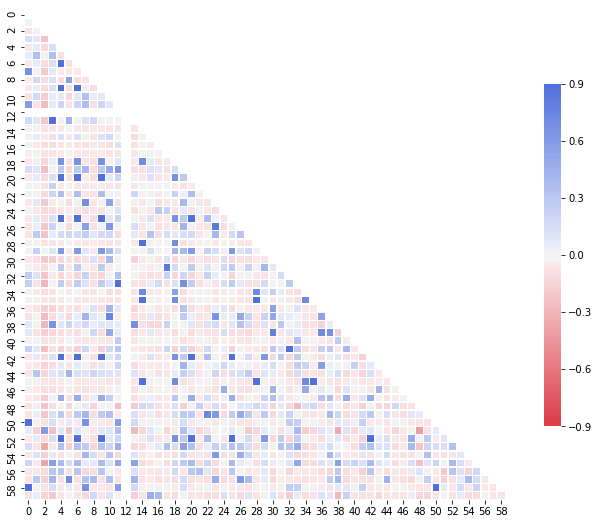

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))
m = sns.diverging_palette(10, -100, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=m, vmax=.9, vmin=-.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

From the plot above, we can say that city articles typically cover different topics than campus articles. There are many low values of correlation hence the major spatial visuals of the transparent red and blue blocks. Only a few correlations that are particularly strong (.5 to .9) occur throughout the comparisons. Also the blank white streak through the matrix visualization is because one of the similarity matrices shows zero similarities.

In [393]:
matr2 = []
for i in range(len(store_similarity_info)):
    matr2.append([i,list(store_similarity_info[i][3]),store_similarity_info[i][-1]])
#### ADD INDEX AT MAX VALUES#################################################################

finding_max = []
for i in range(len(matr2)):
    l = matr2[i][1]
    if len(l) == 0:
        finding_max.append([i,''])
    else:
        finding_max.append([i,max(l)])
        
finding_max

[[0, 0.24051218],
 [1, 0.30036047],
 [2, 0.26612213],
 [3, 0.23071696],
 [4, 0.27482954],
 [5, 0.29115456],
 [6, 0.26484936],
 [7, 0.30660695],
 [8, 0.30036047],
 [9, 0.21019718],
 [10, 0.25306517],
 [11, 0.3142479],
 [12, 0.28406084],
 [13, 0.2318957],
 [14, 0.30036047],
 [15, 0.35489085],
 [16, 0.29042915],
 [17, 0.41982055],
 [18, 0.22340223],
 [19, 0.25054613],
 [20, 0.30036047],
 [21, 0.243639],
 [22, 0.2858581],
 [23, 0.3014709],
 [24, 0.24329983],
 [25, 0.30036047],
 [26, 0.31230563],
 [27, 0.23853491],
 [28, 0.36370757],
 [29, 0.28406084],
 [30, 0.19842607],
 [31, 0.23072065],
 [32, 0.3580115],
 [33, 0.30036047],
 [34, 0.40187716],
 [35, 0.31706434],
 [36, 0.24329983],
 [37, 0.24806328],
 [38, 0.30036047],
 [39, 0.2531437],
 [40, 0.21461277],
 [41, 0.3014709],
 [42, 0.2995339],
 [43, 0.30036047],
 [44, ''],
 [45, 0.24662308],
 [46, 0.23734672],
 [47, 0.30036047],
 [48, 0.21103102],
 [49, 0.4197403],
 [50, 0.2527599],
 [51, 0.27501124],
 [52, 0.21549308],
 [53, 0.30036047],
 [54

In [369]:
finding_max[0]

[0, 0.24051218]

In [413]:
max_ind = []
for i in range(len(finding_max)):
    if finding_max[i][1] == '':
        max_ind.append(-99999)
    else:
        max_ind.append(list(store_similarity_info[i][2]).index(finding_max[i][1]))


In [402]:
similarities_with_campus_index = [x for x in zip(finding_max,max_ind)]
similarities_with_campus_index[:5]

[([0, 0.24051218], 44),
 ([1, 0.30036047], 2),
 ([2, 0.26612213], 55),
 ([3, 0.23071696], 34),
 ([4, 0.27482954], 54)]

In [403]:
print(city_documents[1],'\n'+campus_documents[2])

Police Logs 
Police Accountability Board holds Winter Quarter public meeting with low turnout


In [406]:
biggest_corr = []

for i in finding_max:
    biggest_corr.append(i[1])
    
biggest_corr.index('')

44

In [407]:
biggest_corr.pop(44)

''

##### Biggest similarities given below

In [412]:
top_5 = sorted(biggest_corr)[-5:]
top_5

[0.36370757, 0.40187716, 0.40845254, 0.4197403, 0.41982055]

In [425]:
for i in range(len(similarities_with_campus_index)):
    if similarities_with_campus_index[i][0][1] in top_5:
        print('City_Index:',i,'   Campus Info:',similarities_with_campus_index[i])

City_Index: 17    Campus Info: ([17, 0.41982055], 51)
City_Index: 28    Campus Info: ([28, 0.36370757], 5)
City_Index: 34    Campus Info: ([34, 0.40187716], 55)
City_Index: 49    Campus Info: ([49, 0.4197403], 39)
City_Index: 59    Campus Info: ([59, 0.40845254], 43)


In [430]:
print(city_documents[17],'\n'+campus_documents[51])

print('\n'+city_documents[28],'\n'+campus_documents[5])

print('\n'+city_documents[34],'\n'+campus_documents[55])

print('\n'+city_documents[49],'\n'+campus_documents[39])

print('\n'+city_documents[59],'\n'+campus_documents[43])

Davis Senior High’s Citrus Circuits aids Davis Police Department in finding homeless shelters 
People Power of Davis group works to achieve greater transparency from UC Davis Police Department

Education on bike safety for youth 
UC Regents will vote on nonresident tuition hike on Wednesday

Davis Chorale receives Harmony in Our Lives Award 
UC Davis receives a record number of applicants for Fall 2018

Union Pacific considering shutdown of popular I-80 shortcut 
Recap of UC Board of Regents January meeting

North Davis lot to go through habitat restoration 
Liberty In North Korea club hosts North Korean refugee at event


As we can see there are only slight similarities with words like Davis, receives, and of. Most titles are not related whatsoever besides the 1st grouping above which talks about Davis Police Department. In general, I think the corpus is slightly representative of the Aggie becuase of how much it references words like Davis and other topics. But there are shortcomings in that there are so many titles with small words like 'in', 'for', 'to', etc which interfere with the similarity matrix. 